In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

data = pd.read_csv("rfm_data.csv")
print(data.head())

   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  
0     Tokyo  
1    London  
2  New York  
3    London  
4     Paris  


In [2]:
data = pd.read_csv(r'C:\Users\BiG\Jupyter Lab\Bootcamp\Assignment 2\rfm_data.csv')

In [3]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [5]:
data.ProductInformation.value_counts()

Product C    277
Product D    253
Product B    245
Product A    225
Name: ProductInformation, dtype: int64

In [6]:
from datetime import datetime

# Convert 'PurchaseDate' to datetime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

# Calculate Recency
data['Recency'] = (datetime.now().date() - data['PurchaseDate'].dt.date).dt.days

# Calculate Frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')

# Calculate Monetary Value
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')

In [7]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=5, labels=monetary_scores)

In [8]:
# Convert RFM scores to numeric type
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

In [9]:
# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

In [10]:
# Create a new column for RFM Customer Segments
data['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Cant Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
print(data[['CustomerID', 'RFM Customer Segments']])

     CustomerID RFM Customer Segments
0          8814             Cant Lose
1          2188                  Lost
2          4608                  Lost
3          2559                  Lost
4          9482             Cant Lose
..          ...                   ...
995        2970   Potential Loyalists
996        6669   Potential Loyalists
997        8836   Potential Loyalists
998        1440   Potential Loyalists
999        4759   Potential Loyalists

[1000 rows x 2 columns]


In [11]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,185,1,943.31,1,1,2,4,Low-Value,Cant Lose
1,2188,2023-04-11,463.70,Product A,176819,London,185,1,463.70,1,1,1,3,Low-Value,Lost
2,4608,2023-04-11,80.28,Product A,340062,New York,185,1,80.28,1,1,1,3,Low-Value,Lost
3,2559,2023-04-11,221.29,Product A,239145,London,185,1,221.29,1,1,1,3,Low-Value,Lost
4,9482,2023-04-11,739.56,Product A,194545,Paris,185,1,739.56,1,1,2,4,Low-Value,Cant Lose


In [12]:
data['Value Segment'].value_counts()
data['Value Segment'] = data['Value Segment'].map({'Low-Value': 0, 'Mid-Value': 1, 'High-Value':2 })

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CustomerID             1000 non-null   int64         
 1   PurchaseDate           1000 non-null   datetime64[ns]
 2   TransactionAmount      1000 non-null   float64       
 3   ProductInformation     1000 non-null   object        
 4   OrderID                1000 non-null   int64         
 5   Location               1000 non-null   object        
 6   Recency                1000 non-null   int64         
 7   Frequency              1000 non-null   int64         
 8   MonetaryValue          1000 non-null   float64       
 9   RecencyScore           1000 non-null   int32         
 10  FrequencyScore         1000 non-null   int32         
 11  MonetaryScore          1000 non-null   int32         
 12  RFM_Score              1000 non-null   int32         
 13  Valu

In [14]:
data['RFM Customer Segments'].value_counts()

Potential Loyalists    503
At Risk Customers      180
Cant Lose              173
Lost                    82
Champions               62
Name: RFM Customer Segments, dtype: int64

In [15]:

# Assuming your target variable is in a column named 'Target_Class'
data['RFM Customer Segments'] = data['RFM Customer Segments'].map({'Cant Lose': 0, 'Lost': 1, 'At Risk Customers':2 , 'Potential Loyalists':3})

In [16]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,185,1,943.31,1,1,2,4,0,0.0
1,2188,2023-04-11,463.70,Product A,176819,London,185,1,463.70,1,1,1,3,0,1.0
2,4608,2023-04-11,80.28,Product A,340062,New York,185,1,80.28,1,1,1,3,0,1.0
3,2559,2023-04-11,221.29,Product A,239145,London,185,1,221.29,1,1,1,3,0,1.0
4,9482,2023-04-11,739.56,Product A,194545,Paris,185,1,739.56,1,1,2,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,125,1,759.62,5,1,2,8,2,3.0
996,6669,2023-06-10,941.50,Product C,987025,New York,125,1,941.50,5,1,2,8,2,3.0
997,8836,2023-06-10,545.36,Product C,512842,London,125,1,545.36,5,1,2,8,2,3.0
998,1440,2023-06-10,729.94,Product B,559753,Paris,125,1,729.94,5,1,2,8,2,3.0


In [17]:

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(data['Location'], prefix='Location')

# Concatenate the one-hot encoded columns with the original DataFrame
data = pd.concat([data, one_hot_encoded], axis=1)

# Drop the original 'Location' column if desired
data.drop('Location', axis=1, inplace=True)
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments,Location_London,Location_New York,Location_Paris,Location_Tokyo
0,8814,2023-04-11,943.31,Product C,890075,185,1,943.31,1,1,2,4,0,0.0,0,0,0,1
1,2188,2023-04-11,463.70,Product A,176819,185,1,463.70,1,1,1,3,0,1.0,1,0,0,0
2,4608,2023-04-11,80.28,Product A,340062,185,1,80.28,1,1,1,3,0,1.0,0,1,0,0
3,2559,2023-04-11,221.29,Product A,239145,185,1,221.29,1,1,1,3,0,1.0,1,0,0,0
4,9482,2023-04-11,739.56,Product A,194545,185,1,739.56,1,1,2,4,0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,125,1,759.62,5,1,2,8,2,3.0,1,0,0,0
996,6669,2023-06-10,941.50,Product C,987025,125,1,941.50,5,1,2,8,2,3.0,0,1,0,0
997,8836,2023-06-10,545.36,Product C,512842,125,1,545.36,5,1,2,8,2,3.0,1,0,0,0
998,1440,2023-06-10,729.94,Product B,559753,125,1,729.94,5,1,2,8,2,3.0,0,0,1,0


In [18]:

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(data['ProductInformation'], prefix='Info-')

# Concatenate the one-hot encoded columns with the original DataFrame
data = pd.concat([data, one_hot_encoded], axis=1)

# Drop the original 'Location' column if desired
data.drop('ProductInformation', axis=1, inplace=True)
data

,CustomerID,PurchaseDate,TransactionAmount,OrderID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,...,Value Segment,RFM Customer Segments,Location_London,Location_New York,Location_Paris,Location_Tokyo,Info-_Product A,Info-_Product B,Info-_Product C,Info-_Product D
0,8814,2023-04-11,943.31,890075,185,1,943.31,1,1,2,...,0,0.0,0,0,0,1,0,0,1,0
1,2188,2023-04-11,463.70,176819,185,1,463.70,1,1,1,...,0,1.0,1,0,0,0,1,0,0,0
2,4608,2023-04-11,80.28,340062,185,1,80.28,1,1,1,...,0,1.0,0,1,0,0,1,0,0,0
3,2559,2023-04-11,221.29,239145,185,1,221.29,1,1,1,...,0,1.0,1,0,0,0,1,0,0,0
4,9482,2023-04-11,739.56,194545,185,1,739.56,1,1,2,...,0,0.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,275284,125,1,759.62,5,1,2,...,2,3.0,1,0,0,0,0,1,0,0
996,6669,2023-06-10,941.50,987025,125,1,941.50,5,1,2,...,2,3.0,0,1,0,0,0,0,1,0
997,8836,2023-06-10,545.36,512842,125,1,545.36,5,1,2,...,2,3.0,1,0,0,0,0,0,1,0
998,1440,2023-06-10,729.94,559753,125,1,729.94,5,1,2,...,2,3.0,0,0,1,0,0,1,0,0


In [19]:
data['Year'] = data['PurchaseDate'].dt.year
data['Month'] = data['PurchaseDate'].dt.month
data['Day'] = data['PurchaseDate'].dt.day
data.drop('PurchaseDate', axis=1, inplace=True)
data

,CustomerID,TransactionAmount,OrderID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,...,Location_New York,Location_Paris,Location_Tokyo,Info-_Product A,Info-_Product B,Info-_Product C,Info-_Product D,Year,Month,Day
0,8814,943.31,890075,185,1,943.31,1,1,2,4,...,0,0,1,0,0,1,0,2023,4,11
1,2188,463.70,176819,185,1,463.70,1,1,1,3,...,0,0,0,1,0,0,0,2023,4,11
2,4608,80.28,340062,185,1,80.28,1,1,1,3,...,1,0,0,1,0,0,0,2023,4,11
3,2559,221.29,239145,185,1,221.29,1,1,1,3,...,0,0,0,1,0,0,0,2023,4,11
4,9482,739.56,194545,185,1,739.56,1,1,2,4,...,0,1,0,1,0,0,0,2023,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,759.62,275284,125,1,759.62,5,1,2,8,...,0,0,0,0,1,0,0,2023,6,10
996,6669,941.50,987025,125,1,941.50,5,1,2,8,...,1,0,0,0,0,1,0,2023,6,10
997,8836,545.36,512842,125,1,545.36,5,1,2,8,...,0,0,0,0,0,1,0,2023,6,10
998,1440,729.94,559753,125,1,729.94,5,1,2,8,...,0,1,0,0,1,0,0,2023,6,10


In [20]:

data['Value Segment'] = data['Value Segment'].astype(int)


In [21]:
mean_segment = data['RFM Customer Segments'].mean()
data['RFM Customer Segments'].fillna(mean_segment, inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             1000 non-null   int64  
 1   TransactionAmount      1000 non-null   float64
 2   OrderID                1000 non-null   int64  
 3   Recency                1000 non-null   int64  
 4   Frequency              1000 non-null   int64  
 5   MonetaryValue          1000 non-null   float64
 6   RecencyScore           1000 non-null   int32  
 7   FrequencyScore         1000 non-null   int32  
 8   MonetaryScore          1000 non-null   int32  
 9   RFM_Score              1000 non-null   int32  
 10  Value Segment          1000 non-null   int32  
 11  RFM Customer Segments  1000 non-null   float64
 12  Location_London        1000 non-null   uint8  
 13  Location_New York      1000 non-null   uint8  
 14  Location_Paris         1000 non-null   uint8  
 15  Locat

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data into a pandas DataFrame

# Separate the input features (X) and the label (y)
X = data.drop('RFM Customer Segments', axis=1)  # Drop the label column from the features
y = data['RFM Customer Segments']  # Select the label column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 22)
X_test shape: (200, 22)
y_train shape: (800,)
y_test shape: (200,)


In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Print the predictions
#for i, prediction in enumerate(predictions):
 #   print(f"Prediction for X_test[{i}]: {prediction}")

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate evaluation metrics
mse = mean_squared_error(y_test , predictions)
rmse = mean_squared_error(y_test , predictions, squared=False)
mae = mean_absolute_error(y_test , predictions)
r2 = r2_score(y_test , predictions)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²) coefficient:", r2)

Mean Squared Error (MSE): 0.45066850910779316
Root Mean Squared Error (RMSE): 0.6713184855996394
Mean Absolute Error (MAE): 0.5354375894692806
R-squared (R²) coefficient: 0.5827702113214386


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
RF_mse = mean_squared_error(y_test, y_pred)
RF_rmse = mean_squared_error(y_test, y_pred, squared=False)
RF_mae = mean_absolute_error(y_test, y_pred)
RF_r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²) coefficient:", r2)

Mean Squared Error (MSE): 0.45066850910779316
Root Mean Squared Error (RMSE): 0.6713184855996394
Mean Absolute Error (MAE): 0.5354375894692806
R-squared (R²) coefficient: 0.5827702113214386


In [27]:
if RF_mse > mse :
    print('LinearRegression is better.')
elif RF_mse == mse :
    print('They have same values.')
else:
    print('RandomForestRegressor is better.')

    
if RF_rmse > rmse :
    print('LinearRegression is better.')
elif RF_rmse == rmse :
    print('They have same values.')
else:
    print('RandomForestRegressor is better.')
    
    
if RF_mae > mae :
    print('LinearRegression is better.')
elif RF_mae == mae :
    print('They have same values.')
else:
    print('RandomForestRegressor is better.')
    
    
if RF_r2 > r2 :
    print('LinearRegression is better.')
elif RF_r2 == r2 :
    print('They have same values.')
else:
    print('RandomForestRegressor is better.')

RandomForestRegressor is better.
RandomForestRegressor is better.
RandomForestRegressor is better.
LinearRegression is better.


## We can see that RandomForestRegressor performs better.

Text(0, 0.5, 'Different Errors')

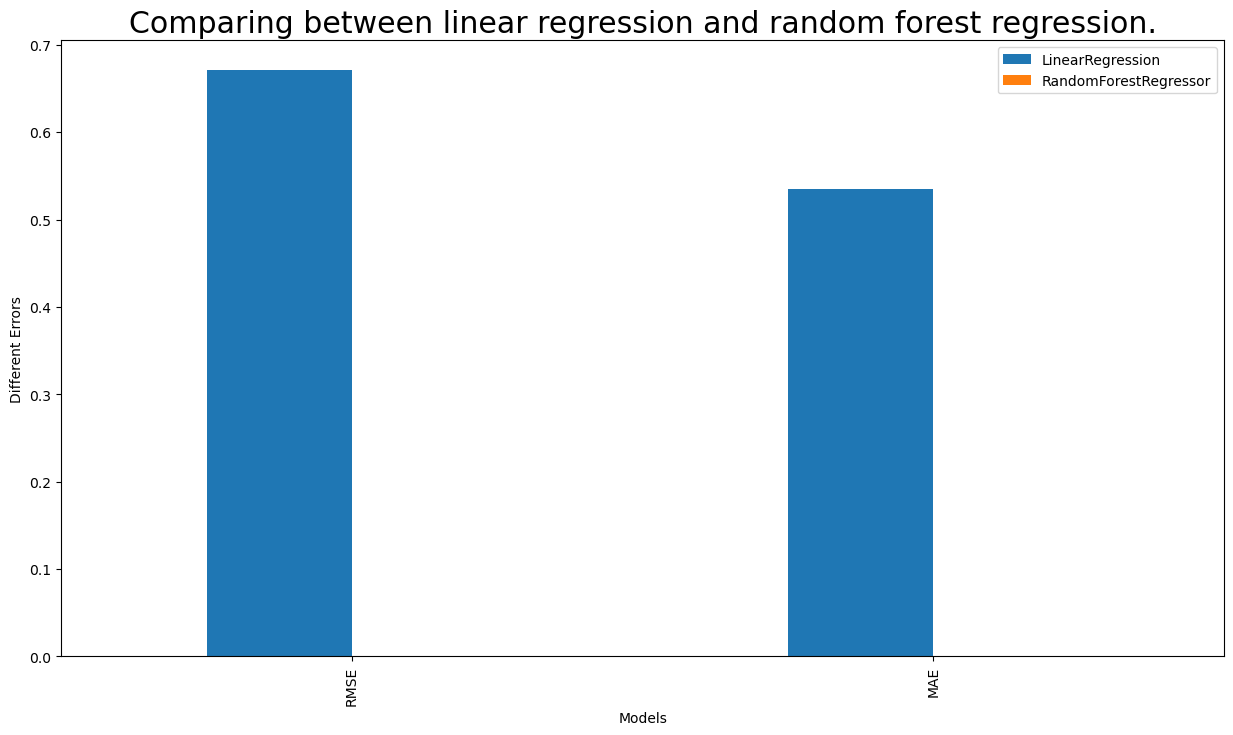

In [28]:
import matplotlib.pyplot as plt
plotdata = pd.DataFrame({

    "LinearRegression":[rmse, mae],

    "RandomForestRegressor":[RF_rmse, RF_mae]},

    index=[ "RMSE" , "MAE"])
plotdata.plot(kind="bar" , figsize=(15,8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.title('Comparing between linear regression and random forest regression.')
plt.xlabel("Models")
plt.ylabel("Different Errors")

Text(0, 0.5, 'Different Errors')

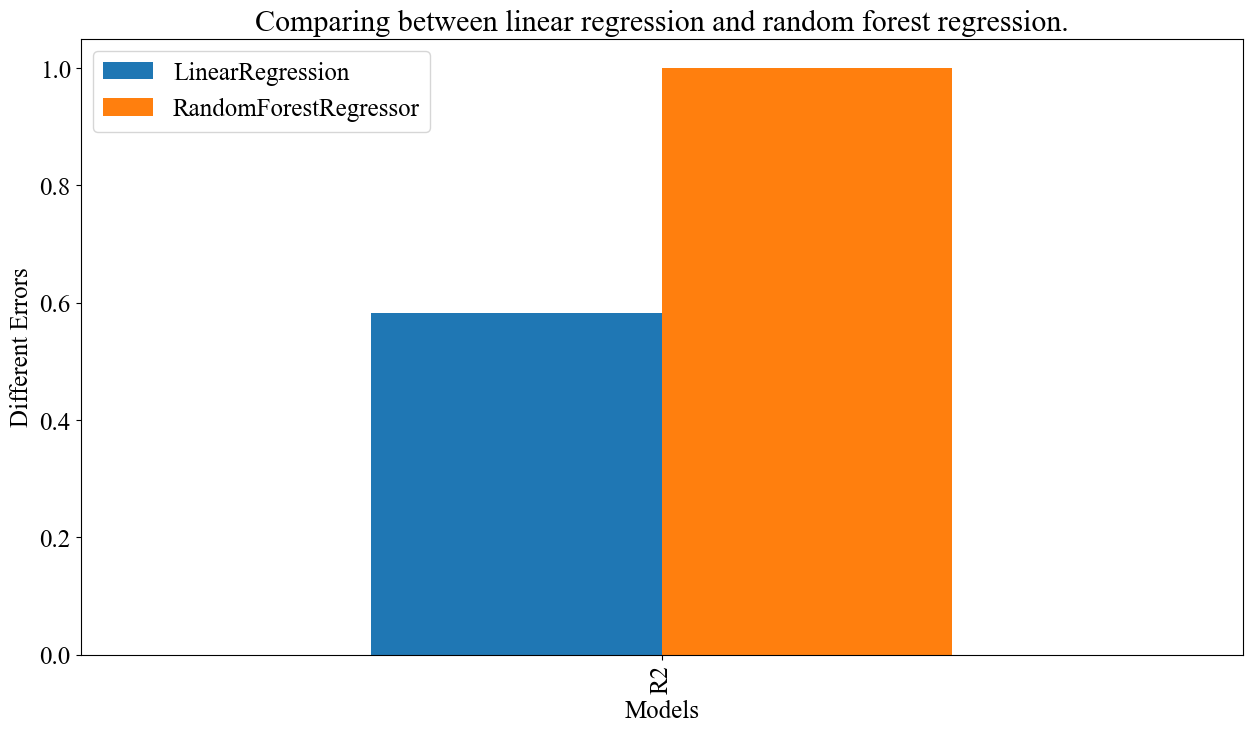

In [29]:
import matplotlib.pyplot as plt
plotdata = pd.DataFrame({

    "LinearRegression":[r2],

    "RandomForestRegressor":[RF_r2]},

    index=["R2"])
plotdata.plot(kind="bar" , figsize=(15,8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.title('Comparing between linear regression and random forest regression.')
plt.xlabel("Models")
plt.ylabel("Different Errors")

Text(0, 0.5, 'Different Errors')

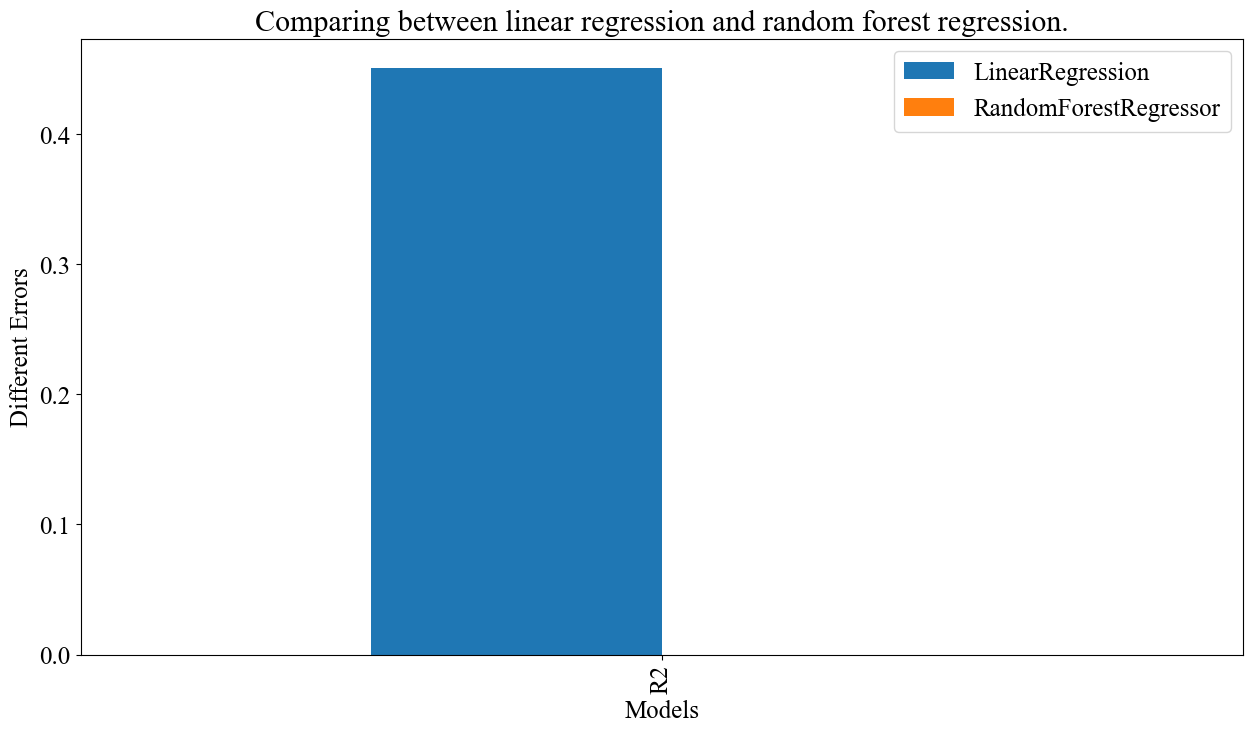

In [30]:
import matplotlib.pyplot as plt
plotdata = pd.DataFrame({

    "LinearRegression":[mse],

    "RandomForestRegressor":[RF_mse]},

    index=["R2"])
plotdata.plot(kind="bar" , figsize=(15,8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.title('Comparing between linear regression and random forest regression.')
plt.xlabel("Models")
plt.ylabel("Different Errors")

### Random Forest Regression is a powerful machine learning technique that often outperforms Linear Regression in predicting booking prices on platforms like Airbnb. It excels at capturing nonlinear relationships, handling outliers and categorical variables, providing feature importance, and dealing with multicollinearity. By leveraging an ensemble of decision trees, Random Forest Regression can more accurately model complex interactions and patterns in the data, resulting in improved predictive performance compared to Linear Regression. However, the choice between the two models should consider the specific dataset and problem at hand, as Linear Regression still holds value in scenarios with simpler relationships.